In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Modèle SIR sans diffusion

Le système est modélisé par les équations suivantes:
$$\left\{
\begin{array}{r c l}
S'(t) &=& -\beta S(t) I(t)\\
I'(t) &=& \beta S(t) I(t) - \alpha I(t)\\
R'(t) &=& \alpha I(t)
\end{array} \right. $$

on fait l'hypothèse que :
$\alpha = 0.1 $ et que $\beta = 0.2$.

In [52]:
T=100
I0 = 0.02
S0 = 0.98
R0 = 0
alpha = 0.1 
beta = 0.2
N= 100001
h = T / (N - 1)

In [53]:
S=zeros(N)
R=zeros(N)
I=zeros(N)
S[0]=S0
R[0]=R0
I[0]=I0
for i in range (N-1):
    S1 = S[i] - h * beta * S[i] * I[i]
    I1 = I[i] + beta * h * S[i] * I[i] - alpha * h * I[i]
    R[i+1] = R[i] + alpha * h * I[i]
    S[i+1] = S1
    I[i+1] = I1

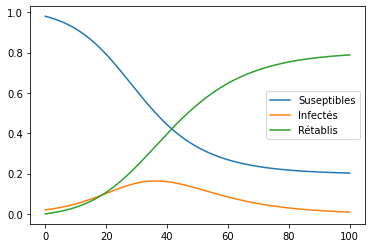

In [54]:
t=linspace(0,T,N)
plot(t,S,label = 'Suseptibles')
plot(t,I,label='Infectés')
plot(t,R,label='Rétablis')
legend() 
show()

## Modèle SIR avec diffusion

On s'intéresse désormais au système suivant avec diffusion:
$$\left\{
\begin{array}{r c l}
S'(t) &=& -\beta S(t) I(t) + \Delta S\\
I'(t) &=& \beta S(t) I(t) - \alpha I(t) + \Delta I\\
R'(t) &=& \alpha I(t)
\end{array} \right. $$


In [2]:
M = 201
N = 40001
L = 2
T = 0.1
k = T / (N - 1)
h = L / (M - 1)

In [3]:
def I0(x, y):
    z = matmul(exp(-10 * (x - L / 2) ** 2), exp( -10 * (y - L / 2) ** 2).T)
    return z / norm(z)

In [4]:
e = ones(M)
ee = ones(M - 1)
La = -2 * diag(e) + diag(ee, 1) + diag(ee, -1)
print(La)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


In [5]:
alpha = 0.1
beta = 0.2

In [6]:
xx = linspace(0, L, M).reshape((M, 1))
yy = linspace(0, L, M).reshape((M, 1))

In [7]:
Iinit = I0(xx, yy)

Text(0.5, 0, 'Iinit')

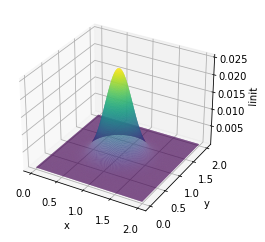

In [8]:
ax = axes(projection='3d')
X, Y = meshgrid(xx, yy)
ax.plot_surface(X, Y, Iinit, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Iinit')



In [9]:
Sinit = ones((M, M)) - Iinit
Sinit = Sinit / norm(Sinit)

I = Iinit
S = Sinit
for i in range(N):
    S1 = S + (k / h**2) * (dot(La, S) + dot(S, La)) - alpha * k * S * I
    I = I + (k / h**2) * (dot(La, I) + dot(I, La)) + alpha * k * S * I - beta * k * I
    S = S1

Text(0.5, 0, 'I')

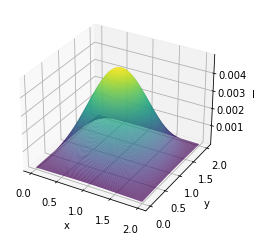

In [10]:
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(xx, yy)
ax.plot_surface(X, Y, I, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('I')